```
L'idée :
Diagramme ombrothermique comparant la dernière année enregistrée avec la moyenne des x dernières années.
Pour ça y'a besoin des données journalières de la dernière année et des données mensuelles des dernières années.
```

```
Il vaut mieux que tu crée un tableau avec les valeurs de 2023 et les valeurs moyennes entre 2002 et 2023 plutot que de mixer les deux graphes a la fin
```

In [1]:
from math import*
import pandas as pd
import numpy as np
import os
import pandas as pd
import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')  # Activer l'extension pour afficher les graphiques
output_dir = 'output/'
os.makedirs(output_dir, exist_ok=True)

# Plot données 2024

In [ ]:
data = pd.read_csv(r"data\MENSQ_31_latest-2024-2025.csv", sep=';', decimal=',', thousands='.', index_col=0)  # Lire le fichier CSV
data.head()

In [ ]:
data_2024 = data[data['AAAAMM'].astype(str).str.startswith('2024')]   # Filtrer les données pour l'année 2023
data_2024 = data_2024[['AAAAMM', 'RR', 'TM']]    # Sélectionner les colonnes d'intérêt
data_2024['Mois'] = data_2024['AAAAMM'].astype(str).str[4:6].astype(int)   # Extraire le mois
data_2024 = data_2024.sort_values(by='Mois')     # Trier les données par mois

In [ ]:
data_2024_auz = data_2024.loc[31035001]          # Filtrer les données pour l'AUZ 31035001
data_2024_auz['TM_2023'] = data_2024_auz['TM'] / 10 
data_2024_auz['RR_2023'] = data_2024_auz['RR'] / 10
data_2024_auz.set_index('Mois', inplace=True)     # Définir le mois comme index
data_2024_auz = data_2024_auz[['RR_2023', 'TM_2023']]       # Sélectionner les colonnes d'intérêt
data_2024_auz.to_json(output_dir + 'data_2024_auz.json', orient='table')  # Sauvegarder les données au format JSON
data_2024_auz

# Plot données 2003-2022

In [ ]:
data = pd.read_csv(r"data\MENSQ_31_previous-1950-2023.csv", sep=';', decimal=',', thousands='.', index_col=0)  # Lire le fichier CSV
data.head()

In [ ]:
data_auz = data.loc[31035001]
data_auz.head(2)

In [ ]:
data_auz = data.loc[31035001]
data_auz.index = pd.to_datetime(data_auz['AAAAMM'].astype(str), format='%Y%m')
data_1950_auz = data_auz[['RR', 'TM']]          # Filtrer les données pour l'AUZ 31035001
data_1950_auz['TM_mean'] = data_1950_auz['TM'] / 10 
data_1950_auz['RR_mean'] = data_1950_auz['RR'] / 10
data_1950_auz

In [ ]:
dt_after_2003 = data_1950_auz.loc['2003':]    # Filtrer les données à partir de 2003 
dt_after_2003

In [ ]:
mean_2003_2023 = dt_after_2003[['TM_mean','RR_mean']].groupby(dt_after_2003.index.month).mean()    # Calculer la moyenne mensuelle
mean_2003_2023.index.name = 'Mois'
mean_2003_2023.to_json(output_dir + 'mean_2003_2023.json', orient='table')    # Sauvegarder les données au format JSON
mean_2003_2023

# Mix des deux tableaux

In [4]:
data_2024 = pd.read_json(r'output\data_2024_auz.json', orient='table')    # Lire les données de 2023
data_2003_2023 = pd.read_json(r'output\mean_2003_2023.json', orient='table')    # Lire les données de 2003 à 2022

In [5]:
table = data_2024.join(data_2003_2023)    # Joindre les deux jeux de données
table.index = pd.to_datetime(table.index, format='%m').month_name()    # Convertir l'index en noms de mois
table['Mois']=table.index
table

,RR_2023,TM_2023,TM_mean,RR_mean,Mois
Mois,,,,,
January,40.0,7.7,6.238095,69.738095,January
February,76.0,9.6,7.180952,40.523810,February
March,69.0,11.9,10.171429,52.928571,March
April,54.5,13.2,13.076190,60.904762,April
May,93.5,15.9,16.419048,65.452381,May
June,41.0,20.4,20.861905,61.333333,June
July,47.0,23.2,22.714286,35.500000,July
August,60.5,23.7,22.680952,37.600000,August
September,51.5,17.7,19.685714,41.850000,September


In [ ]:
table.to_csv(r'output/table_finale.csv')

In [6]:
pd.read_csv(r'output/table_finale.csv', index_col=0, thousands=',')    # Lire le fichier CSV

,RR_2023,TM_2023,TM_mean,RR_mean,Mois.1
Mois,,,,,
January,40.0,7.7,6.238095,69.738095,January
February,76.0,9.6,7.180952,40.523810,February
March,69.0,11.9,10.171429,52.928571,March
April,54.5,13.2,13.076190,60.904762,April
May,93.5,15.9,16.419048,65.452381,May
June,41.0,20.4,20.861905,61.333333,June
July,47.0,23.2,22.714286,35.500000,July
August,60.5,23.7,22.680952,37.600000,August
September,51.5,17.7,19.685714,41.850000,September


## Barplot

In [ ]:
import pandas as pd
import holoviews as hv
table_bar = table[['RR_mean','RR_2023','Mois']]
melted_table = table_bar.melt(id_vars='Mois', var_name='Type', value_name='Pluviométrie')

# Création des barres avec des catégories combinées
bars = hv.Bars(melted_table, kdims=['Mois', 'Type'], vdims='Pluviométrie').opts(
    xlabel='Mois',
    ylabel='Pluviométrie (mm)',
    color='Type',
    legend_position='top_left',
    width=900,
    height=400,
    tools=['hover'],
    title="Pluviométrie mensuelle (2023 vs Moyenne)",
    multi_level=False
)

bars

In [ ]:
curves = hv.Curve(
    table, kdims=['Mois'], vdims=['TM_2023'], label='Température 2023'
).opts(
    line_width=2, color='blue'
) * hv.Curve(
    table, kdims=['Mois'], vdims=['TM_mean'], label='Température pré-2022'
).opts(
    line_width=2, color='red'
)

# Personnalisation du graphique
curves = curves.opts(
    title="Températures mensuelles (2023 vs Moyenne pré-2022)",
    xlabel="Mois",
    ylabel="Température (°C)",
    legend_position='top_left',
    tools=['hover'],
    width=900,
    height=400
)

curves

In [ ]:
# Création des barres pour RR_2023 et RR_mean
melted_table = table.melt(id_vars='Mois', value_vars=['RR_2023', 'RR_mean'], 
                          var_name='Type', value_name='Pluviométrie')

bars = hv.Bars(melted_table, kdims=['Mois', 'Type'], vdims='Pluviométrie').opts(
    xlabel='Mois',
    ylabel='Pluviométrie (mm)',
    color='Type',
    legend_position='top_left',
    tools=['hover'],
    width=900,
    height=400,
    alpha=0.7,  # Ajout de transparence pour distinguer les barres et les courbes
    muted_alpha=0.2,
    multi_level=False
)

# Création des courbes pour TM_2023 et TM_mean
curves = hv.Curve(
    table, kdims=['Mois'], vdims=['TM_2023'], label='Température 2023'
).opts(
    line_width=2, color='blue'
) * hv.Curve(
    table, kdims=['Mois'], vdims=['TM_mean'], label='Température pré-2022'
).opts(
    line_width=2, color='red'
)

# Superposition des barres et des courbes
combined = (bars * curves).opts(
    title="Pluviométrie et Température mensuelles (2023 vs Moyenne)",
    xlabel="Mois",
    ylabel="Valeurs",
    legend_position='top_left',
    tools=['hover'],
    width=900,
    height=400
)

combined

# Test avec mathplotlib

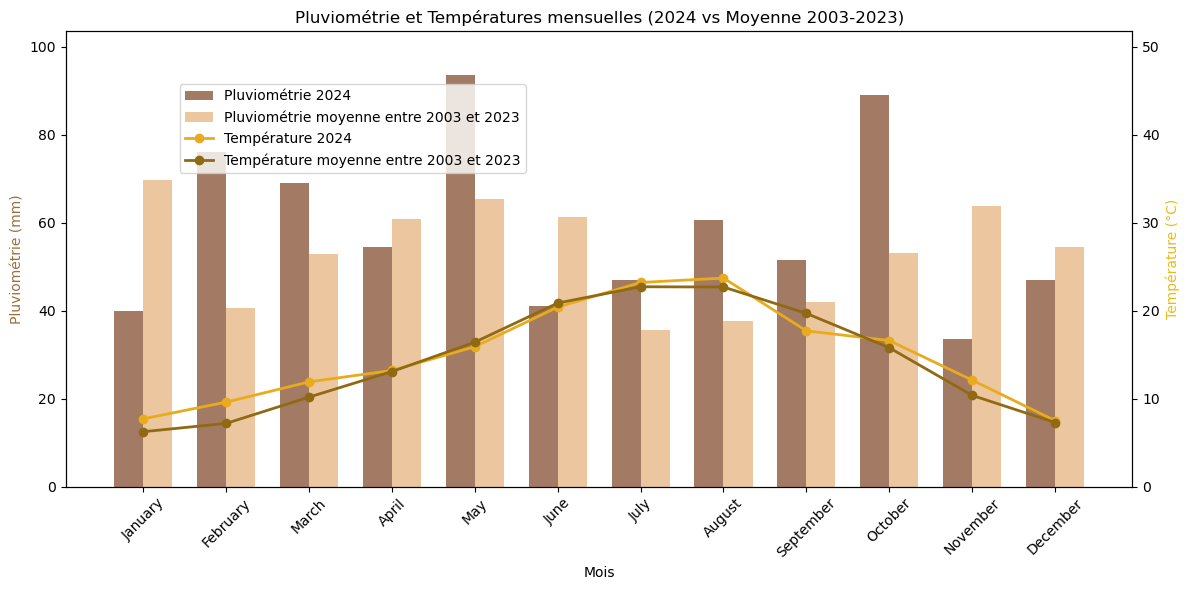

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# Chargement du tableau CSV
table = pd.read_csv('output/table_finale.csv')

# Configuration de la figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Couleurs des barres et des courbes
bar_colors = ['#7c4324', '#e3ae76']
curve_colors = ['#e8ab1e', '#906a13']

# Barres pour RR_2023 et RR_mean
bar_width = 0.35
x = range(len(table['Mois']))

ax1.bar(
    [i - bar_width / 2 for i in x],
    table['RR_2023'],
    width=bar_width,
    label='Pluviométrie 2024',
    color=bar_colors[0],
    alpha=0.7
)

ax1.bar(
    [i + bar_width / 2 for i in x],
    table['RR_mean'],
    width=bar_width,
    label='Pluviométrie moyenne entre 2003 et 2023',
    color=bar_colors[1],
    alpha=0.7
)

ax1.set_ylabel("Pluviométrie (mm)", color='#9b6e3e')
ax1.set_xlabel("Mois")
ax1.set_xticks(x)
ax1.set_xticklabels(table['Mois'], rotation=45)

# Ajustement des limites pour l'axe des précipitations
precipitation_max = max(table['RR_2023'].max(), table['RR_mean'].max())
ax1.set_ylim(0, precipitation_max + 10)

# Courbes pour TM_2023 et TM_mean
ax2 = ax1.twinx()
ax2.plot(
    table['Mois'], 
    table['TM_2023'], 
    label='Température 2024', 
    color=curve_colors[0], 
    linewidth=2, 
    marker='o'
)
ax2.plot(
    table['Mois'], 
    table['TM_mean'], 
    label='Température moyenne entre 2003 et 2023', 
    color=curve_colors[1], 
    linewidth=2, 
    marker='o'
)

# Ajustement des limites pour l'axe des températures (1/2 de l'axe des précipitations)
temperature_max = max(table['TM_2023'].max(), table['TM_mean'].max())
temperature_limit = (precipitation_max + 10) / 2  # Diviser par 2
scaling_factor = temperature_limit / temperature_max  # Facteur d'échelle

ax2.set_ylim(0, temperature_max * scaling_factor)
ax2.set_ylabel("Température (°C)", color='#e9bb1d')

# Ajout des légendes
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# Activation des interactions avec mplcursors
cursor = mplcursors.cursor(highlight=True)
cursor.connect(
    "add", lambda sel: sel.annotation.set_text(
        f"{sel.artist.get_label()}\n{sel.target[0]}: {sel.target[1]:.2f}"
    )
)

# Titre et affichage
plt.title("Pluviométrie et Températures mensuelles (2024 vs Moyenne 2003-2023)")
plt.tight_layout()
plt.show()

# Analyse humidex

In [16]:
def HI(T,P):
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 0.002211732
    c8 = 0.00072546
    c9 = -0.000003582
    hi = c1 + c2*T + c3*P + c4*T*P + c5*(T**2) + c6*(P**2) + c7*(T**2)*P + c8*T*(P**2) + c9*(T**2)*(P**2)
    return hi

In [17]:
def Tr(T,P):
    p = P/100
    a = 17.27
    b = 237.7
    A = a*T/(b+T)+log(p)
    tr = (b*A)/(a-A)
    return tr

In [18]:
def Humi(Tair,Tros):
    humi = Tair + (5/9)*(6.11*exp(5417.7530*((1/273.16)-(1/(273.15+Tros))))-10)
    return humi

In [23]:
data_T = pd.read_csv(r"data\Q_31_previous-1950-2023_RR-T-Vent.csv", sep=';', decimal=',', thousands='.', index_col=0)  # Lire le fichier CSV
data_T = data_T[['TX','AAAAMMJJ']]
data_T_auz = data_T.loc[31035001]
data_T_auz

,TX,AAAAMMJJ
NUM_POSTE,,
31035001,188.0,20020525
31035001,170.0,20020526
31035001,163.0,20020527
31035001,220.0,20020528
31035001,204.0,20020529
...,...,...
31035001,127.0,20231227
31035001,115.0,20231228
31035001,142.0,20231229


In [24]:
data_T_auz.loc[:,'AAAAMMJJ'] = pd.to_datetime(data_T_auz["AAAAMMJJ"].astype(str), format='%Y%m%d') 

C:\Users\orabo\AppData\Local\Temp\ipykernel_27504\1802940713.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2002-05-25 00:00:00', '2002-05-26 00:00:00', '2002-05-27 00:00:00',
 '2002-05-28 00:00:00', '2002-05-29 00:00:00', '2002-05-30 00:00:00',
 '2002-05-31 00:00:00', '2002-06-01 00:00:00', '2002-06-02 00:00:00',
 '2002-06-03 00:00:00',
 ...
 '2023-12-22 00:00:00', '2023-12-23 00:00:00', '2023-12-24 00:00:00',
 '2023-12-25 00:00:00', '2023-12-26 00:00:00', '2023-12-27 00:00:00',
 '2023-12-28 00:00:00', '2023-12-29 00:00:00', '2023-12-30 00:00:00',
 '2023-12-31 00:00:00']
Length: 7844, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_T_auz.loc[:,'AAAAMMJJ'] = pd.to_datetime(data_T_auz["AAAAMMJJ"].astype(str), format='%Y%m%d')


In [25]:
data_T_auz.set_index('AAAAMMJJ', inplace=True)
data_T_auz

,TX
AAAAMMJJ,
2002-05-25,188.0
2002-05-26,170.0
2002-05-27,163.0
2002-05-28,220.0
2002-05-29,204.0
...,...
2023-12-27,127.0
2023-12-28,115.0
2023-12-29,142.0


In [26]:
data_T_auz = data_T_auz.loc['2003':]
data_T_auz.loc[:,'TX'] = data_T_auz['TX'] / 10
data_T_auz

,TX
AAAAMMJJ,
2003-01-01,10.1
2003-01-02,19.1
2003-01-03,17.3
2003-01-04,11.2
2003-01-05,5.2
...,...
2023-12-27,12.7
2023-12-28,11.5
2023-12-29,14.2


In [27]:
data_UM = pd.read_csv(r"data\Q_31_previous-1950-2023_autres-parametres.csv", sep=';', decimal=',', thousands='.', index_col=0)  # Lire le fichier CSV
data_UM = data_UM[['UM','AAAAMMJJ']]
data_UM_auz = data_UM.loc[31035001]
data_UM_auz

,UM,AAAAMMJJ
NUM_POSTE,,
31035001,82.0,20020525
31035001,88.0,20020526
31035001,83.0,20020527
31035001,70.0,20020528
31035001,74.0,20020529
...,...,...
31035001,88.0,20231227
31035001,88.0,20231228
31035001,92.0,20231229


In [28]:
data_UM_auz.loc[:,'AAAAMMJJ'] = pd.to_datetime(data_UM_auz["AAAAMMJJ"].astype(str), format='%Y%m%d') 

C:\Users\orabo\AppData\Local\Temp\ipykernel_27504\3673651195.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2002-05-25 00:00:00', '2002-05-26 00:00:00', '2002-05-27 00:00:00',
 '2002-05-28 00:00:00', '2002-05-29 00:00:00', '2002-05-30 00:00:00',
 '2002-05-31 00:00:00', '2002-06-01 00:00:00', '2002-06-02 00:00:00',
 '2002-06-03 00:00:00',
 ...
 '2023-12-22 00:00:00', '2023-12-23 00:00:00', '2023-12-24 00:00:00',
 '2023-12-25 00:00:00', '2023-12-26 00:00:00', '2023-12-27 00:00:00',
 '2023-12-28 00:00:00', '2023-12-29 00:00:00', '2023-12-30 00:00:00',
 '2023-12-31 00:00:00']
Length: 7844, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_UM_auz.loc[:,'AAAAMMJJ'] = pd.to_datetime(data_UM_auz["AAAAMMJJ"].astype(str), format='%Y%m%d')


In [29]:
data_UM_auz.set_index('AAAAMMJJ', inplace=True)

In [30]:
data_UM_auz = data_UM_auz.loc['2003':]
data_UM_auz

,UM
AAAAMMJJ,
2003-01-01,99.0
2003-01-02,85.0
2003-01-03,83.0
2003-01-04,89.0
2003-01-05,80.0
...,...
2023-12-27,88.0
2023-12-28,88.0
2023-12-29,92.0


In [31]:
table = data_T_auz.join(data_UM_auz)
table.head(2)

,TX,UM
AAAAMMJJ,,
2003-01-01,10.1,99.0
2003-01-02,19.1,85.0


In [32]:
L_TR = []
for i,j in zip(table['TX'],table['UM']):
    L_TR.append(Tr(i,j))
table['TR'] = L_TR

In [33]:
L_HUMI = []
for i,j in zip(table['TX'],table['TR']):
    L_HUMI.append(Humi(i,j))
table['HUMI'] = L_HUMI

In [34]:
ete = [6,7,8]
table_ete = table[table.index.month.isin(ete)]
table_ete.loc[:,'HI'] = HI(table_ete.loc[:,'TX'],table_ete.loc[:,'UM'])
table_ete 

C:\Users\orabo\AppData\Local\Temp\ipykernel_27504\501192194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_ete.loc[:,'HI'] = HI(table_ete.loc[:,'TX'],table_ete.loc[:,'UM'])


,TX,UM,TR,HUMI,HI
AAAAMMJJ,,,,,
2003-06-17,NaN,77.0,NaN,NaN,NaN
2003-06-18,26.2,64.0,18.839844,32.841214,27.316391
2003-06-19,30.3,55.0,20.232935,38.064558,32.400430
2003-06-20,35.7,53.0,24.608756,47.617433,43.719468
2003-06-21,38.8,45.0,24.687749,50.801957,47.977048
...,...,...,...,...,...
2023-08-27,22.2,74.0,17.338079,27.725618,23.180432
2023-08-28,24.5,71.0,18.887012,31.177820,25.395054
2023-08-29,23.4,66.0,16.677192,28.464234,24.650992


In [ ]:
table_ete['TX'].max()

In [35]:
table_ete['annee'] = table_ete.index.year
table_ete['mois'] = table_ete.index.strftime('%B')
table_ete['jour'] = table_ete.index.day

C:\Users\orabo\AppData\Local\Temp\ipykernel_27504\2438275028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_ete['annee'] = table_ete.index.year
C:\Users\orabo\AppData\Local\Temp\ipykernel_27504\2438275028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_ete['mois'] = table_ete.index.strftime('%B')
C:\Users\orabo\AppData\Local\Temp\ipykernel_27504\2438275028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [36]:
table_ete['Risque'] = pd.cut(table_ete['HUMI'], bins=[0, 30, 40, 45, 55, 100], labels=[
    "Aucun inconfort", 
    "Incofort léger", 
    "Beaucoup d'inconfort", 
    "Danger, coup de chaleur probable", 
    "Coup de chaleur imminent"])
table_ete

C:\Users\orabo\AppData\Local\Temp\ipykernel_27504\2934265918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_ete['Risque'] = pd.cut(table_ete['HUMI'], bins=[0, 30, 40, 45, 55, 100], labels=[


,TX,UM,TR,HUMI,HI,annee,mois,jour,Risque
AAAAMMJJ,,,,,,,,,
2003-06-17,NaN,77.0,NaN,NaN,NaN,2003,June,17,NaN
2003-06-18,26.2,64.0,18.839844,32.841214,27.316391,2003,June,18,Incofort léger
2003-06-19,30.3,55.0,20.232935,38.064558,32.400430,2003,June,19,Incofort léger
2003-06-20,35.7,53.0,24.608756,47.617433,43.719468,2003,June,20,"Danger, coup de chaleur probable"
2003-06-21,38.8,45.0,24.687749,50.801957,47.977048,2003,June,21,"Danger, coup de chaleur probable"
...,...,...,...,...,...,...,...,...,...
2023-08-27,22.2,74.0,17.338079,27.725618,23.180432,2023,August,27,Aucun inconfort
2023-08-28,24.5,71.0,18.887012,31.177820,25.395054,2023,August,28,Incofort léger
2023-08-29,23.4,66.0,16.677192,28.464234,24.650992,2023,August,29,Aucun inconfort


In [ ]:
cmap = {
    "Aucun inconfort": "green",
    "Incofort léger": "yellow",
    "Beaucoup d'inconfort": "orange",
    "Danger, coup de chaleur probable": "red",
    "Coup de chaleur imminent": "purple"
}

In [ ]:
test

In [60]:
color_levels = [0,30,40,45,55,100]
cmap = cmap = ['green', 'yellow', 'orange', 'red', 'purple']

In [61]:
test = table_ete.loc['2023']
test.hvplot.heatmap(x='mois', y='jour', C='HUMI', title='Humidex (2023)').opts(cmap=cmap, color_levels=color_levels, width=900, height=400)

:HeatMap   [mois,jour]   (HUMI)

In [63]:
test = table_ete[['HUMI']]
test_group = test.groupby(test.index.to_period('M')).mean()
test_group['month'] = test_group.index.strftime('%B')
test_group['year'] = test_group.index.year
test_group.hvplot.heatmap(x='year', y='month', C='HUMI', title='Humidex (2003-2023)').opts(cmap=cmap, color_levels=color_levels, width=900, height=400)

:HeatMap   [year,month]   (HUMI)